<a href="https://colab.research.google.com/github/jeanferuzi-oss/econo/blob/2/etapa_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 2: Reducción de Dimensionalidad con PCA
En esta fase del proyecto, nos enfrentamos a un dataset con una alta densidad de información macroeconómica y demográfica. Trabajar con demasiadas variables puede generar el problema de la dimensionalidad, donde el ruido de los datos dificulta el rendimiento de los modelos de clasificación.

Para optimizar nuestro análisis, aplicaremos la técnica de Análisis de Componentes Principales (PCA). Este método estadístico transforma el conjunto original de variables correlacionadas en un nuevo conjunto de variables no correlacionadas llamadas Componentes Principales.


**Metodología Adoptada**



**Preparación y Estandarización:** Dado que variables como el PIB y el Crecimiento Poblacional manejan escalas drásticamente distintas, se seleccionarán únicamente las columnas numéricas para aplicar una estandarización. Esto garantiza que el PCA no se sesgue hacia las variables con magnitudes numéricas más altas.

**Extracción de Varianza:** Se ejecutará el algoritmo PCA para identificar cuánto aporte informativo ofrece cada nueva componente. Utilizaremos el gráfico de varianza acumulada para visualizar este impacto.

**Criterio de Selección:** Siguiendo las mejores prácticas, seleccionaremos el número mínimo de componentes necesarias para retener entre el 70% y el 90% de la varianza total. Este rango permite simplificar significativamente el modelo sin perder los patrones esenciales que explican las diferencias entre países.

**Generación del Insumo:** El resultado final será un nuevo DataFrame compuesto por estas componentes principales. Este "dataset reducido" servirá como la base de entrenamiento para nuestros futuros modelos de clasificación, permitiendo una ejecución más eficiente y una mejor generalización de los resultados.

#Vinculación de Almacenamiento Cloud
Establece una conexión directa entre el entorno de ejecución de Google Colab y el sistema de archivos de Google Drive. Esto permite la lectura y persistencia de datos de forma permanente en la nube, facilitando el acceso a archivos CSV

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Recuperación de Datos: Conexión entre Etapa 1 y Etapa 2
La carga del archivo CSV desde Google Drive permite recuperar todo el trabajo de limpieza y ordenamiento realizado anteriormente. Este paso es el punto de partida para el análisis de la Etapa 2, asegurando que los nombres de columnas y la estructura de los datos sean los correctos. La visualización de las primeras filas confirma que la base de datos está lista para aplicar la estandarización y el modelo de Componentes Principales (PCA).

In [25]:
import pandas as pd

# Si lo guardaste como CSV:
ruta = '/content/drive/My Drive/datos_world_bank.csv'
df_wb = pd.read_csv(ruta)

# Visualizacion
df_wb.head()


,Iso,Country,PIB_PPP,Crecimiento_Poblacional,Poblacion_Total,Poblacion_Mujeres,Poblacion_Mujeres_Pct,Poblacion_Hombres,Poblacion_Hombres_Pct,Crecimiento_Pob_Urbana,...,IED_Salida_Neta,IED_Entrada_Pct_PIB,Emisiones_CO2_Ind,Acceso_Cocina_Limpia_Total_Pct,Esperanza_Vida_Mujeres,Esperanza_Vida_Total,Esperanza_Vida_Hombres,Acceso_Cocina_Limpia_Rural_Pct,Acceso_Cocina_Limpia_Urbano_Pct,Uso_Internet_Pct
0,ABW,Aruba,Low,0.045652,107359.0,56653.0,52.769620,50706.0,47.230380,-0.028616,...,5.487612e+07,-3.584591,0.00210,91.5,78.779,76.353,73.702,84.15,97.6,81.7221
1,AFG,Afghanistan,Medium,2.135594,41454761.0,20530683.0,49.525513,20924078.0,50.474487,2.446706,...,0.000000e+00,0.000000,0.09310,38.6,67.536,66.035,64.467,20.40,87.0,17.7089
2,AGO,Angola,Medium-High,3.080655,36749906.0,18568216.0,50.525887,18181690.0,49.474113,4.233833,...,3.335616e+07,-1.977864,1.79770,50.2,67.144,64.617,62.099,8.40,75.0,44.7581
3,ALB,Albania,Medium-Low,-1.543108,2414095.0,1220548.0,50.559226,1193547.0,49.440774,-0.946506,...,2.627767e+08,6.900370,0.81860,86.1,81.446,79.602,77.728,72.50,95.2,83.1356
4,AND,Andorra,Low,1.433748,80856.0,39502.0,48.854754,41354.0,51.145246,1.506784,...,2.215940e+08,7.285975,1.40855,100.0,86.107,84.041,82.100,100.00,100.0,95.4456


#Estandarización de Variables: Homogeneización de Escalas
Este proceso nivela todas las variables para que sean comparables entre sí antes de aplicar el PCA. Al eliminar columnas de texto e identificación, el algoritmo se concentra exclusivamente en las relaciones numéricas de los datos.

**Escala Común:** Transforma cada columna para que tenga una media de 0 y una desviación estándar de 1.

**Equidad de Peso:** Evita que variables con cifras muy grandes (como la Población Total) tengan más importancia que variables con números pequeños (como porcentajes de desempleo) por el simple hecho de su unidad de medida.

**Preparación Matemática:** Convierte los datos originales en unidades de desviación, lo cual es un requisito técnico indispensable para que el Análisis de Componentes Principales funcione correctamente.

In [26]:
# Estandarización las variables numéricas para eliminar diferencias de escala y asegurar un procesamiento equitativo en el análisis posterior.

from sklearn.preprocessing import StandardScaler

x = df_wb.drop(columns=['Iso', 'Country', 'PIB_PPP'], errors='ignore')

features = x.columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

pd.DataFrame(X_scaled, columns=features).head()

,Crecimiento_Poblacional,Poblacion_Total,Poblacion_Mujeres,Poblacion_Mujeres_Pct,Poblacion_Hombres,Poblacion_Hombres_Pct,Crecimiento_Pob_Urbana,Poblacion_Urbana,Poblacion_Urbana_Pct,Fuerza_Laboral_Mujeres_Pct,...,IED_Salida_Neta,IED_Entrada_Pct_PIB,Emisiones_CO2_Ind,Acceso_Cocina_Limpia_Total_Pct,Esperanza_Vida_Mujeres,Esperanza_Vida_Total,Esperanza_Vida_Hombres,Acceso_Cocina_Limpia_Rural_Pct,Acceso_Cocina_Limpia_Urbano_Pct,Uso_Internet_Pct
0,-0.704162,-0.269300,-0.273980,0.936469,-0.264785,-0.936469,-0.965277,-0.285423,-0.016335,0.328335,...,-0.112753,-0.552062,-0.154016,0.550707,0.369220,0.407060,0.393946,0.503299,0.558962,0.366212
1,0.625129,0.009848,0.009025,-0.150035,0.010631,0.150035,0.393740,-0.154235,-1.620658,-4.184911,...,-0.113964,-0.273286,-0.153154,-0.945685,-1.191537,-1.052840,-0.909261,-1.092123,0.221462,-2.414211
2,1.226227,-0.021916,-0.018101,0.185007,-0.025554,-0.185007,1.374919,0.034676,0.337352,0.844005,...,-0.113228,-0.427106,-0.137012,-0.617553,-1.245955,-1.253473,-1.243425,-1.392437,-0.160613,-1.239325
3,-1.714679,-0.253726,-0.257892,0.196172,-0.249706,-0.196172,-1.469222,-0.268684,-0.176253,0.318006,...,-0.108163,0.263360,-0.146284,0.397956,0.739454,0.866762,0.962080,0.211743,0.482547,0.427607
4,0.178725,-0.269479,-0.274217,-0.374683,-0.264909,0.374683,-0.122302,-0.285355,1.174264,0.328335,...,-0.109072,0.293348,-0.140697,0.791148,1.386496,1.494839,1.579040,0.899964,0.635377,0.962294


#Análisis de Componentes Principales (PCA) y Varianza Acumulada

La aplicación del PCA permite la síntesis de las variables originales en un conjunto reducido de dimensiones ortogonales no correlacionadas. El gráfico de varianza explicada acumulada funciona como una métrica de diagnóstico para cuantificar la pérdida de información asociada a la reducción de dimensionalidad.

Objetivo técnico: Identificar el número mínimo de componentes necesarios para capturar la mayor parte de la varianza del sistema (típicamente entre el 70% y el 90%).

Criterio de selección: La curva permite aplicar el método del codo (Elbow Method), donde el punto de inflexión indica el equilibrio óptimo entre la simplificación del modelo y la retención de la variabilidad original.

Transformación: Cada componente resultante es una combinación lineal de las variables estandarizadas, priorizando aquellas dimensiones que presentan mayor dispersión estadística.

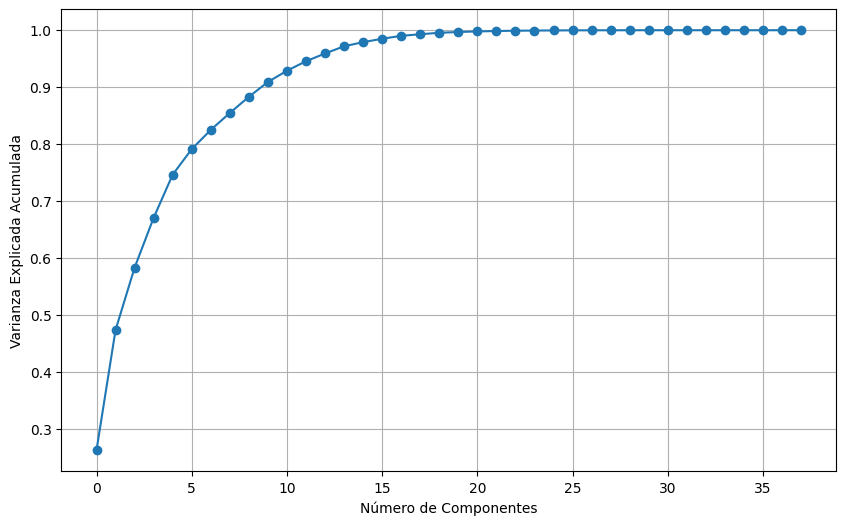

In [21]:
# Calcula y grafica la varianza acumulada de PCA para determinar el número óptimo de componentes que retienen la información esencial.
pca = PCA()
principal_components = pca.fit_transform(X_scaled)

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

#PCA: Simplificación y Retención de Información
El PCA agrupa las 38 variables originales en unos pocos "super indicadores" (componentes) para reducir la complejidad del dataset sin perder información relevante.

Varianza Acumulada: Representa el porcentaje total de información conservada. El gráfico permite identificar cuántos componentes son necesarios para representar la realidad del dataset.

Umbral Crítico (90%): La línea roja marca el punto de eficiencia donde se captura casi toda la variabilidad de los datos, eliminando el ruido y la redundancia.

Simplificación: Este proceso permite trabajar con un modelo mucho más ligero y potente, facilitando la interpretación de qué factores impactan realmente en el desarrollo de los países.

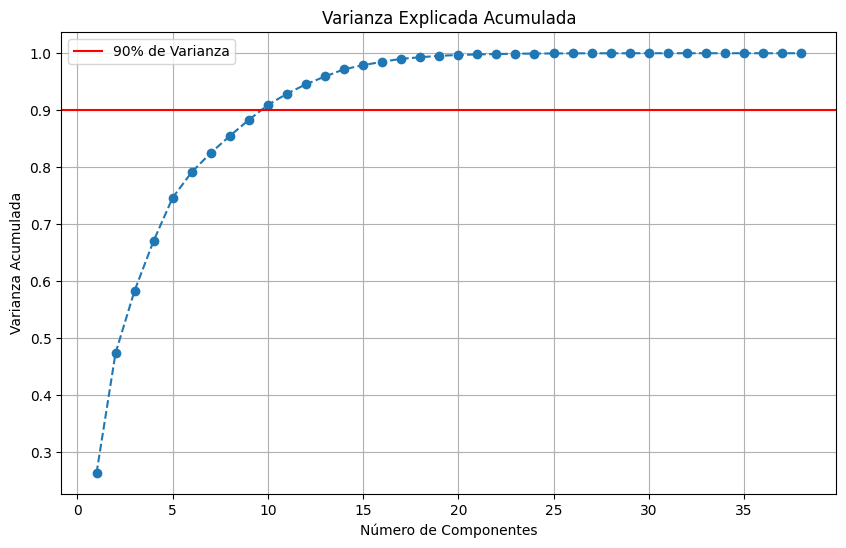

In [22]:
# Aplicación  PCA para identificar y visualizar el número de componentes necesarias para alcanzar el 90% de la varianza acumulada.

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
pca.fit(X_scaled)

varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='-', label='90% de Varianza')
plt.title('Varianza Explicada Acumulada')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.legend()
plt.grid()
plt.show()

In [23]:
# Visualizamos los datos de varianza para elegir el corte exacto
pd.DataFrame(varianza_acumulada, columns=['Varianza Acumulada'])

,Varianza Acumulada
0,0.263110
1,0.474018
2,0.583382
3,0.670860
4,0.746598
5,0.791338
6,0.825103
7,0.854776
8,0.883149
9,0.909151


#Transformación Final y Reducción Dimensional


Este proceso consolida la reducción de datos, transformando las variables originales en un conjunto compacto de componentes principales

1. Generación de Componentes Se proyectan las variables originales en 5 dimensiones (PC1 a PC5). Estos nuevos ejes retienen la mayor parte de la varianza estadística, eliminando la redundancia informativa y simplificando el modelo.

2. Construcción del Dataset Reducido: Se crea una nueva estructura de datos (df_etapa2) optimizada para modelos estadísticos, donde cada país queda representado por sus coordenadas en el nuevo espacio dimensional.

3. Integración del Target: Se vincula el PIB_PPP como variable objetivo al nuevo DataFrame. Esta integración permite relacionar la estructura simplificada de los componentes con el indicador económico principal para futuros análisis de clasificación o regresión.

In [28]:
# Reduce el dataset a las 5 componentes principales seleccionadas y construcción el DataFrame final para el modelado de clasificación

n_components = 5

pca_final = PCA(n_components=n_components)
X_pca = pca_final.fit_transform(X_scaled)

columnas_pca = [f'PC{i+1}' for i in range(n_components)]
df_etapa2 = pd.DataFrame(X_pca, columns=columnas_pca)

df_etapa2['Class_PIB'] = df_wb['PIB_PPP'].values

df_etapa2.head()

,PC1,PC2,PC3,PC4,PC5,Class_PIB
0,-0.245095,1.767078,-0.578606,0.947178,-1.130815,Low
1,-1.643617,-3.885272,1.427006,0.722441,3.833197,Medium
2,-1.341225,-2.742902,0.349610,1.051821,2.091605,Medium-High
3,-0.145278,1.992967,-0.252489,2.069957,-0.240478,Medium-Low
4,0.330916,3.485633,-0.380759,-1.164526,0.008049,Low


# Guardo la nueva base de datos en Drive.

In [29]:
# Conexión con el Almacenamiento en la Nube
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# Guardo mi data nuevo  en Drive
df_etapa2.to_csv('/content/drive/My Drive/datos_world_bank.csv', index=False)